In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data
import matplotlib as mpl
from matplotlib.patches import Polygon

In [2]:
mip = pd.read_csv(r'C:\Users\shepe\Documents\GitHub\tp-msscae-2024\resources\MIP  - Hoja 1 (2).csv', index_col=0)
valores_intermedios = pd.read_csv(r'C:\Users\shepe\Documents\GitHub\tp-msscae-2024\resources\Valores intermedios.csv')


In [3]:
columnas = mip.columns
for col in columnas:
  mip[col] = mip[col].astype(float)
  
  # Armo la matriz de coeficientes técnicos.
for i in range(mip.shape[0]):
  for j in range(mip.shape[0]):
    if valores_intermedios.iloc[j,0] != 0:
      mip.iloc[i, j] = mip.iloc[i, j] / valores_intermedios.iloc[j,0]
    else:
      mip.iloc[i,j] = 0

'''# Drop de sectores que no tienen relación con otros sectores (Hay 3)
for i, col in enumerate(columnas):
    if (mip[col] == 0).all():
        mip = mip.drop(labels=col, axis=0)
        mip = mip.drop(labels=col, axis=1)
        valores_intermedios.drop(i, inplace=True)'''

'# Drop de sectores que no tienen relación con otros sectores (Hay 3)\nfor i, col in enumerate(columnas):\n    if (mip[col] == 0).all():\n        mip = mip.drop(labels=col, axis=0)\n        mip = mip.drop(labels=col, axis=1)\n        valores_intermedios.drop(i, inplace=True)'

In [4]:
red_sectores = mip.copy()
red_sectores = red_sectores.to_numpy()

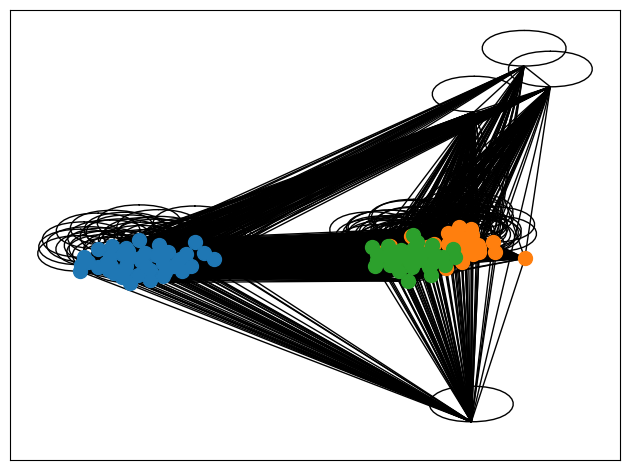

In [5]:
## Intento de visualización por Clusters
G = nx.Graph(red_sectores)
communities = nx.community.greedy_modularity_communities(G)

supergraph = nx.cycle_graph(len(communities))
superpos = nx.spring_layout(G, scale=50, seed=429)

centers = list(superpos.values())
pos = {}
for center, comm in zip(centers, communities):
    pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center, seed=1430))
    
for nodes, clr in zip(communities, ("tab:blue", "tab:orange", "tab:green")):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=clr, node_size=100)
nx.draw_networkx_edges(G, pos=pos)

plt.tight_layout()
plt.show()

In [8]:

## Análisis de grado
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Grado de la red", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Componentes conexas de la red")
ax0.set_axis_off()


ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Rango vs. Grado")
ax1.set_ylabel("Grado")
ax1.set_xlabel("Rango")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Histograma de grado")
ax2.set_xlabel("Grado")
ax2.set_ylabel("# de Nodos")

fig.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'pygraphviz'

ImportError: requires pygraphviz http://pygraphviz.github.io/

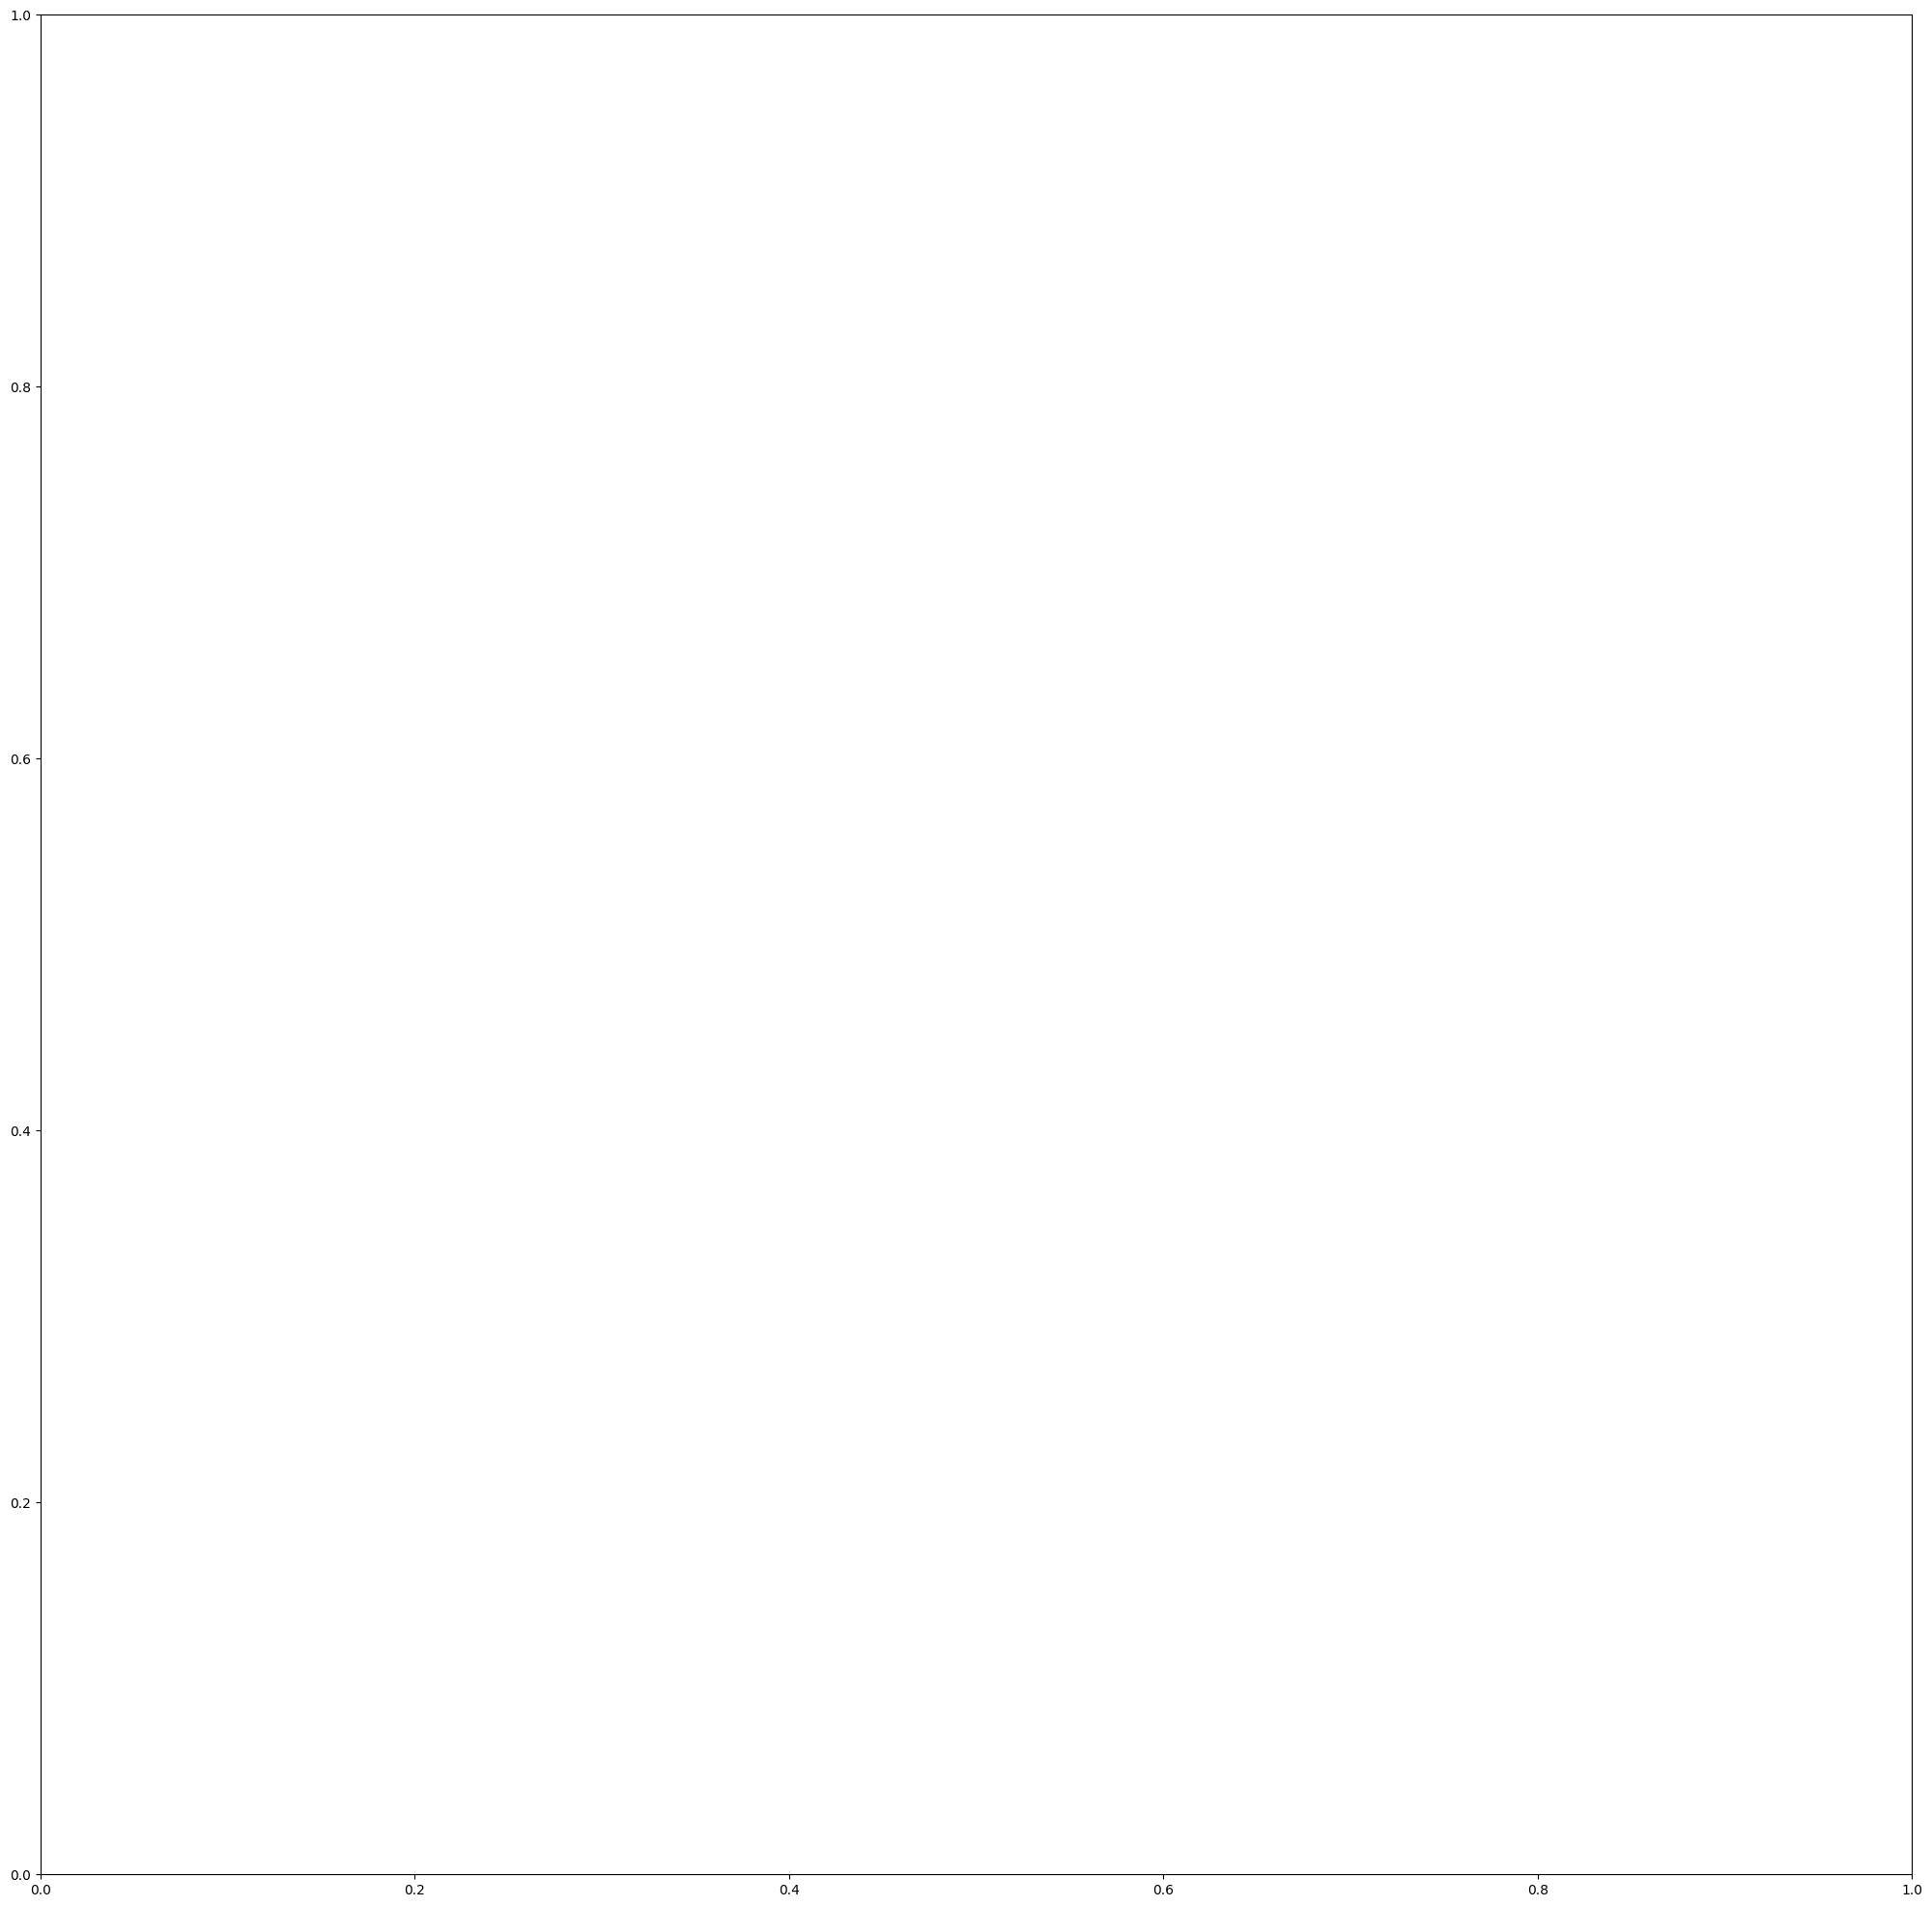

In [6]:

fig, ax = plt.subplots(figsize=(25, 25))
 # identify connected/disconnected nodes
connected = [n for n, d in G.degree() if d > 0]
disconnected = list(set(G.nodes()) - set(connected))
# identify largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
#### draw graph ####
pos = nx.nx_agraph.graphviz_layout(G)
# draw largest connected component
options = {"ax": ax, "edge_color": "tab:red"}
nx.draw_networkx_edges(G0, pos, width=6.0, **options)
# draw other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.3, width=5.0, **options)
# draw connected/disconnected nodes
options = {"ax": ax, "node_size": 30, "edgecolors": "white"}
nx.draw(G, pos, nodelist=connected, **options)
nx.draw(G, pos, nodelist=disconnected, alpha=0.25, **options)
fig.tight_layout()
plt.show()